# Veri Analizi

In [13]:
import pandas as pd
import numpy as np
from pathlib import Path

DATA_DIR = Path('../data/raw')

In [14]:
train = pd.read_csv(DATA_DIR / 'application_train.csv')
test = pd.read_csv(DATA_DIR / 'application_test.csv')

train.shape, test.shape

((307511, 122), (48744, 121))

In [15]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
train.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [18]:
train.isnull().sum().sort_values(ascending=False).head(20)

COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
COMMONAREA_MEDI             214865
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_AVG        210199
LIVINGAPARTMENTS_MEDI       210199
LIVINGAPARTMENTS_MODE       210199
FLOORSMIN_MODE              208642
FLOORSMIN_AVG               208642
FLOORSMIN_MEDI              208642
YEARS_BUILD_AVG             204488
YEARS_BUILD_MODE            204488
YEARS_BUILD_MEDI            204488
OWN_CAR_AGE                 202929
LANDAREA_MEDI               182590
LANDAREA_AVG                182590
LANDAREA_MODE               182590
dtype: int64

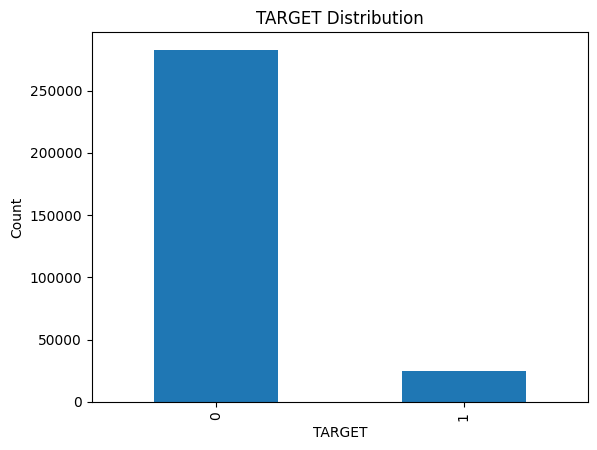

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

train['TARGET'].value_counts().plot(kind='bar')
plt.title("TARGET Distribution")
plt.xlabel("TARGET")
plt.ylabel("Count")
plt.show()

In [20]:
train['TARGET'].value_counts(normalize=True)

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

## Çıkarımlar:
- Train/test büyük bir veri, modelleme için yeterli.

- Default yapan müşteri az. Bu, dengesiz sınıf problemi demek. ROC-AUC’ın tercih edilmesi doğru. Accuracy tek başına yanıltıcı olur.

- Birçok sütunda 200k+ eksik var. Bu sütunlar muhtemelen çok seyrek doldurulmuş ve muhtemel adaylar: düşürme veya kategorik olarak “missing” anlamlandırma.

- Eksik sütun isimleri incelendiğinde çoğu mülk/konut fiziksel özellikleri ile ilgili (yaş, alan, apartman bilgileri). Bazı müşteriler kira/ebeveyn evi vs. olduğundan veri yok.

- Test setinde TARGET yok. Bu, supervised veri seti iş akışına uygun.

- DAYS_BIRTH negatif. Negatif gün formatında yaş temsil edildiğini biliyoruz. Bu ileride dönüştürülecek (yaş= -DAYS_BIRTH/365)

- Genel tablo: dengesiz sınıf, çok eksik konutla ilgili sütunlar, büyük veri seti, noise ihtimali yüksek özellikler. Modelleme aşamasında eksik yönetimi + encoding kritik olacak.

In [21]:
train.isnull().mean().sort_values(ascending=False).head(25)

COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
COMMONAREA_MEDI             0.698723
NONLIVINGAPARTMENTS_MEDI    0.694330
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
FONDKAPREMONT_MODE          0.683862
LIVINGAPARTMENTS_AVG        0.683550
LIVINGAPARTMENTS_MEDI       0.683550
LIVINGAPARTMENTS_MODE       0.683550
FLOORSMIN_MODE              0.678486
FLOORSMIN_AVG               0.678486
FLOORSMIN_MEDI              0.678486
YEARS_BUILD_AVG             0.664978
YEARS_BUILD_MODE            0.664978
YEARS_BUILD_MEDI            0.664978
OWN_CAR_AGE                 0.659908
LANDAREA_MEDI               0.593767
LANDAREA_AVG                0.593767
LANDAREA_MODE               0.593767
BASEMENTAREA_MODE           0.585160
BASEMENTAREA_MEDI           0.585160
BASEMENTAREA_AVG            0.585160
EXT_SOURCE_1                0.563811
NONLIVINGAREA_MODE          0.551792
dtype: float64

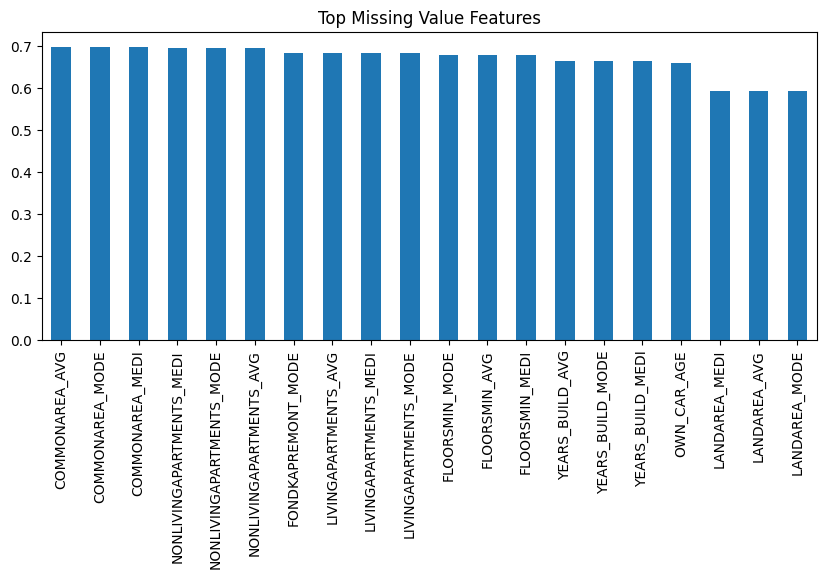

In [22]:
missing = train.isnull().mean().sort_values(ascending=False).head(20)
missing.plot(kind='bar', figsize=(10,4))
plt.title("Top Missing Value Features")
plt.show()

In [23]:
num_cols = train.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = train.select_dtypes(include=['object']).columns.tolist()

len(num_cols), len(cat_cols)

(106, 16)

In [24]:
for c in cat_cols[:5]:
    print(f"\n=== {c} ===")
    print(train[c].value_counts().head())


=== NAME_CONTRACT_TYPE ===
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

=== CODE_GENDER ===
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

=== FLAG_OWN_CAR ===
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

=== FLAG_OWN_REALTY ===
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64

=== NAME_TYPE_SUITE ===
NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Name: count, dtype: int64


In [25]:
age_years = -train['DAYS_BIRTH'] / 365
age_years.describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

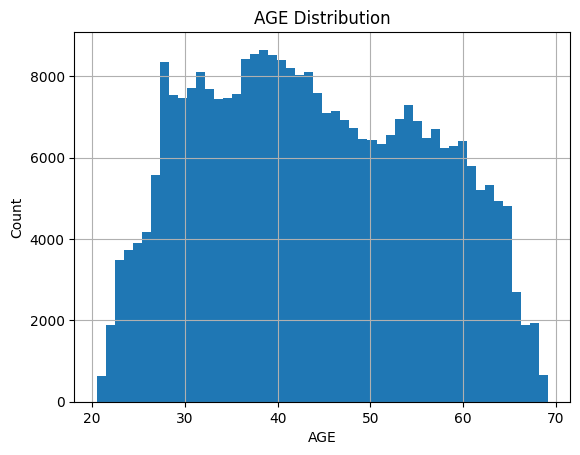

In [27]:
age_years.hist(bins=50)
plt.title("AGE Distribution")
plt.xlabel("AGE")
plt.ylabel("Count")
plt.show()


In [28]:
employment_years = -train['DAYS_EMPLOYED'] / 365
employment_years.describe()

count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

In [29]:
train['DAYS_EMPLOYED'].value_counts().head()

DAYS_EMPLOYED
 365243    55374
-200         156
-224         152
-230         151
-199         151
Name: count, dtype: int64

In [30]:
subset = train[['TARGET','AMT_CREDIT','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_BIRTH','DAYS_EMPLOYED']]
subset.corr()

,TARGET,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED
TARGET,1.000000,-0.030369,-0.003982,-0.012817,0.078239,-0.044932
AMT_CREDIT,-0.030369,1.000000,0.156870,0.770138,-0.055436,-0.066838
AMT_INCOME_TOTAL,-0.003982,0.156870,1.000000,0.191657,0.027261,-0.064223
AMT_ANNUITY,-0.012817,0.770138,0.191657,1.000000,0.009445,-0.104332
DAYS_BIRTH,0.078239,-0.055436,0.027261,0.009445,1.000000,-0.615864
DAYS_EMPLOYED,-0.044932,-0.066838,-0.064223,-0.104332,-0.615864,1.000000


## Çıkarımlar (2)

- Konut ve bina yapısına ait birçok sütunda eksik değer oranı yüzde 55 ila 70 aralığında; bu sütunlar yüksek eksiklik nedeniyle modele gürültü taşıyabilir.
- Yaş dağılımı incelendiğinde ortalama başvuran profili orta yaş seviyesinde; minimum ve maksimum değerler mantıklı aralıktadır.
- Çalışma süresi değişkeninde 365243 değeri çok sık görülmekte; bu değer eksikliği temsil eden bir placeholder olup dönüştürülmesi gerekir.
- Çalışma süresi ile yaş arasında güçlü bir ilişki bulunmaktadır; bu durum modellerde multicollinearity etkisi yaratabilir.
- Kredi tutarı ile aylık taksit arasında yüksek korelasyon mevcuttur; bu iki değişken benzer bilgiyi taşımaktadır.
- Yaş değişkeni ile TARGET arasında küçük fakat anlamlı bir ilişki gözlemlenmiştir; daha genç müşterilerde default riski nispeten yüksektir.
- Korelasyon matrisinde TARGET ile diğer temel sayısal değişkenler arasındaki ilişkiler oldukça zayıftır; bu durum non-linear modellerin daha uygun olacağını gösterir.

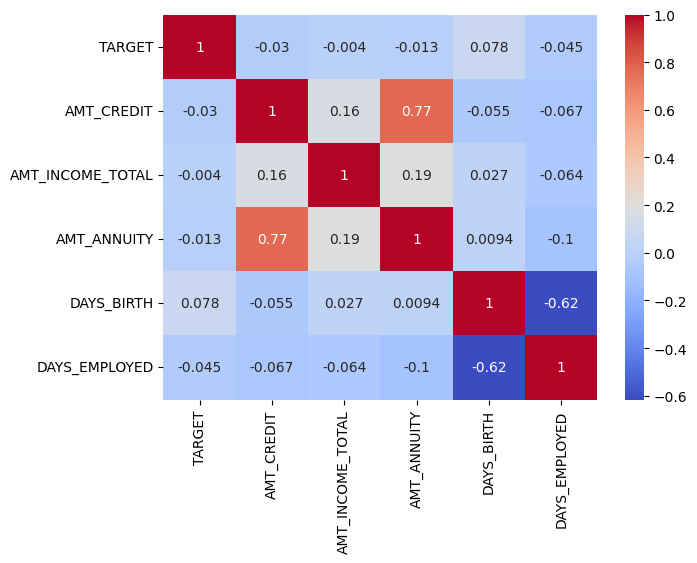

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.heatmap(subset.corr(), annot=True, cmap='coolwarm')
plt.show()

In [32]:
train[cat_cols].nunique().sort_values(ascending=False).head(10)

ORGANIZATION_TYPE             58
OCCUPATION_TYPE               18
NAME_INCOME_TYPE               8
NAME_TYPE_SUITE                7
WALLSMATERIAL_MODE             7
WEEKDAY_APPR_PROCESS_START     7
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_EDUCATION_TYPE            5
FONDKAPREMONT_MODE             4
dtype: int64

In [33]:
train[cat_cols].nunique().sort_values().head(10)

NAME_CONTRACT_TYPE     2
FLAG_OWN_CAR           2
FLAG_OWN_REALTY        2
EMERGENCYSTATE_MODE    2
HOUSETYPE_MODE         3
CODE_GENDER            3
FONDKAPREMONT_MODE     4
NAME_EDUCATION_TYPE    5
NAME_FAMILY_STATUS     6
NAME_HOUSING_TYPE      6
dtype: int64

<Axes: >

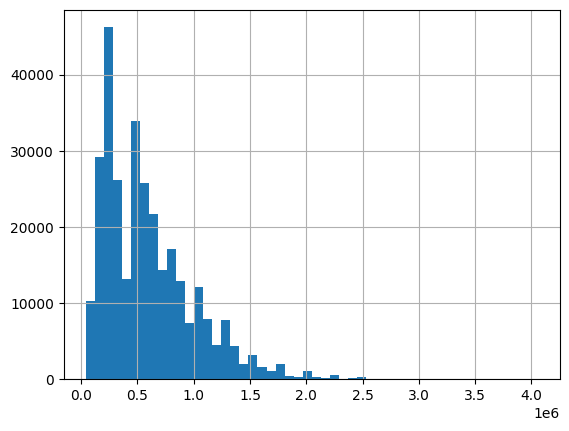

In [34]:
train['AMT_CREDIT'].hist(bins=50)

<Axes: >

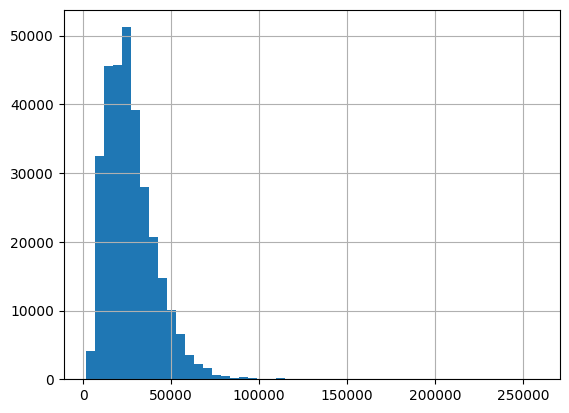

In [35]:
train['AMT_ANNUITY'].hist(bins=50)

<Axes: >

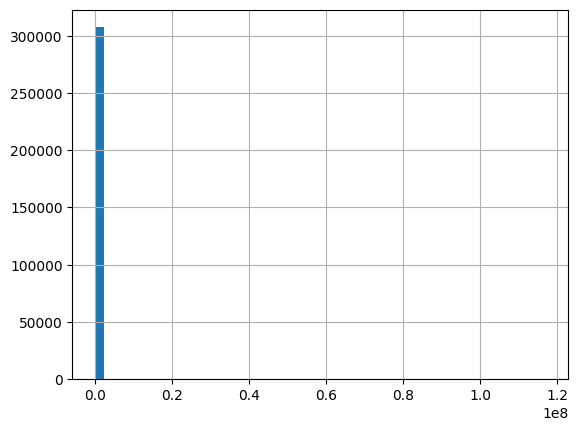

In [36]:
train['AMT_INCOME_TOTAL'].hist(bins=50)

<Axes: >

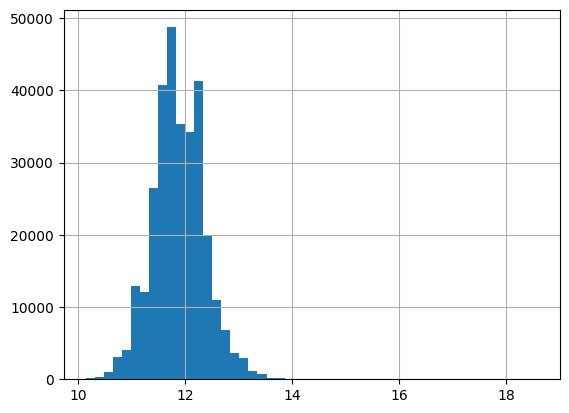

In [37]:
import numpy as np
np.log1p(train['AMT_INCOME_TOTAL']).hist(bins=50)

In [38]:
train[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].isnull().mean()

EXT_SOURCE_1    0.563811
EXT_SOURCE_2    0.002146
EXT_SOURCE_3    0.198253
dtype: float64

<Axes: >

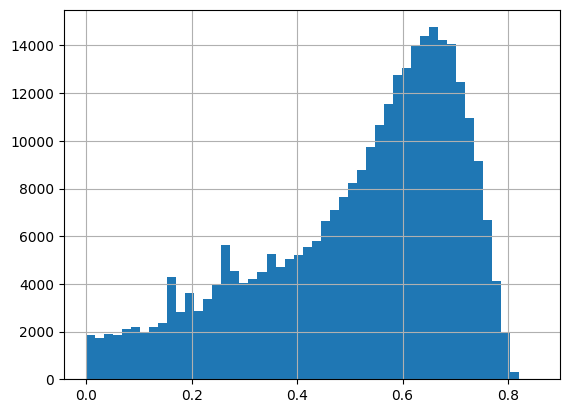

In [39]:
train['EXT_SOURCE_2'].hist(bins=50)

Not::
Bu grafikte şu kritik noktalar var:

- EXT_SOURCE_2 0 ile 1 arasında normalize edilmiş bir skor.
- Değer yükseldikçe kişinin daha güvenilir olduğu anlamına gelir.
- Histogramın yoğunluğu 0.55–0.75 aralığında sıkışmış durumda. Bu, çoğu kişinin makul derecede kredibilitesi olduğunu gösterir.
- Alt bölgelerde (0–0.3) daha seyrek başvurular var; bu grubun TARGET=1 olma oranı genelde daha yüksektir.

<Axes: >

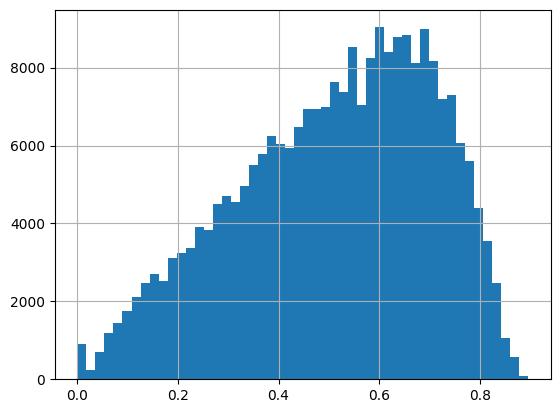

In [40]:
train['EXT_SOURCE_3'].hist(bins=50)

<Axes: xlabel='EXT_SOURCE_2', ylabel='Density'>

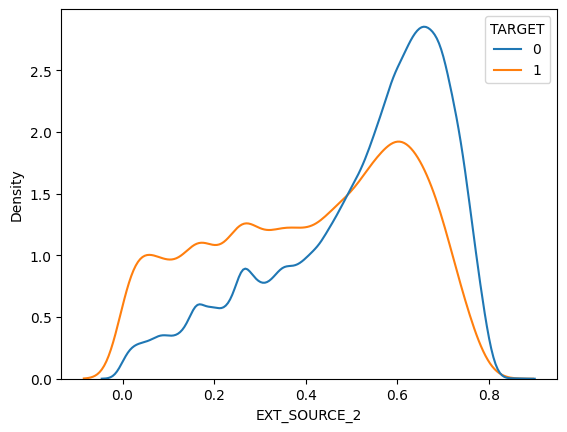

In [41]:
sns.kdeplot(data=train, x='EXT_SOURCE_2', hue='TARGET', common_norm=False)

<Axes: xlabel='EXT_SOURCE_3', ylabel='Density'>

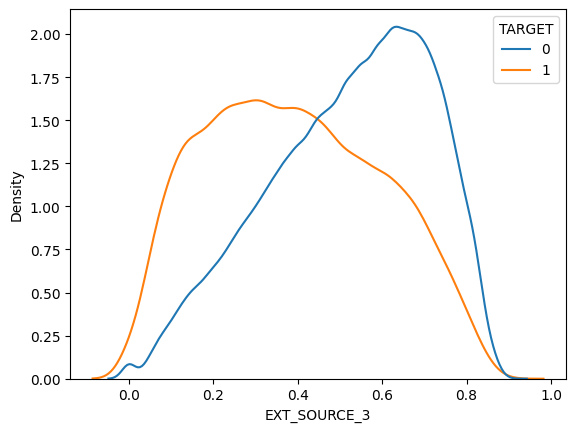

In [42]:
sns.kdeplot(data=train, x='EXT_SOURCE_3', hue='TARGET', common_norm=False)

## Çıkarımlar (3)

- EXT_SOURCE_2 değişkeninin dağılımı incelendiğinde düşük skor aralıklarında (≈0.0–0.3) default eden bireylerin yoğunlaştığı görülmektedir; bu skor kredi geri ödeme davranışını güçlü biçimde yansıtmaktadır.

- EXT_SOURCE_3 değişkeni için de benzer bir ayrışma söz konusudur; TARGET=1 grubu daha düşük skor aralığında toplanmakta, TARGET=0 ise orta-yüksek skor aralığında yoğunlaşmaktadır.

- EXT_SOURCE_2 ve EXT_SOURCE_3 eğrilerinin TARGET sınıfına göre belirgin şekilde ayrışması, bu değişkenlerin modelde yüksek öngörü gücüne sahip olacağını göstermektedir.

- EXT_SOURCE_2 ve EXT_SOURCE_3 dağılımları lineer olmayan bir yapıya sahiptir; bu nedenle gradient boosting türü modellerin bu sinyalleri yakalaması daha olasıdır.

- Düşük harici risk skoruna sahip müşteri segmentleri, belirgin biçimde daha yüksek default riski göstermekte olup bu değişkenler olası politika ve hükümlendirme stratejileri açısından önemli bir ayrım noktasıdır.

In [43]:
train.groupby('CODE_GENDER')['TARGET'].mean()

CODE_GENDER
F      0.069993
M      0.101419
XNA    0.000000
Name: TARGET, dtype: float64

In [44]:
train.groupby('NAME_FAMILY_STATUS')['TARGET'].mean()

NAME_FAMILY_STATUS
Civil marriage          0.099446
Married                 0.075599
Separated               0.081942
Single / not married    0.098077
Unknown                 0.000000
Widow                   0.058242
Name: TARGET, dtype: float64

In [45]:
train.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean()

NAME_EDUCATION_TYPE
Academic degree                  0.018293
Higher education                 0.053551
Incomplete higher                0.084850
Lower secondary                  0.109277
Secondary / secondary special    0.089399
Name: TARGET, dtype: float64

In [46]:
train.groupby('FLAG_OWN_REALTY')['TARGET'].mean()

FLAG_OWN_REALTY
N    0.083249
Y    0.079616
Name: TARGET, dtype: float64

In [47]:
train.groupby('FLAG_OWN_CAR')['TARGET'].mean()

FLAG_OWN_CAR
N    0.085002
Y    0.072437
Name: TARGET, dtype: float64

In [48]:
train.groupby('NAME_INCOME_TYPE')['TARGET'].mean()

NAME_INCOME_TYPE
Businessman             0.000000
Commercial associate    0.074843
Maternity leave         0.400000
Pensioner               0.053864
State servant           0.057550
Student                 0.000000
Unemployed              0.363636
Working                 0.095885
Name: TARGET, dtype: float64

In [49]:
train.groupby('NAME_HOUSING_TYPE')['TARGET'].mean()

NAME_HOUSING_TYPE
Co-op apartment        0.079323
House / apartment      0.077957
Municipal apartment    0.085397
Office apartment       0.065724
Rented apartment       0.123131
With parents           0.116981
Name: TARGET, dtype: float64

In [50]:
train.groupby('WEEKDAY_APPR_PROCESS_START')['TARGET'].mean().sort_values()

WEEKDAY_APPR_PROCESS_START
MONDAY       0.077572
SATURDAY     0.078873
SUNDAY       0.079291
THURSDAY     0.081003
FRIDAY       0.081469
WEDNESDAY    0.081604
TUESDAY      0.083505
Name: TARGET, dtype: float64

In [51]:
train['CNT_CHILDREN'].value_counts().sort_index()

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
8          2
9          2
10         2
11         1
12         2
14         3
19         2
Name: count, dtype: int64

In [52]:
train.groupby('CNT_CHILDREN')['TARGET'].mean()

CNT_CHILDREN
0     0.077118
1     0.089236
2     0.087218
3     0.096314
4     0.128205
5     0.083333
6     0.285714
7     0.000000
8     0.000000
9     1.000000
10    0.000000
11    1.000000
12    0.000000
14    0.000000
19    0.000000
Name: TARGET, dtype: float64

In [53]:
train['CNT_FAM_MEMBERS'].value_counts().sort_index()

CNT_FAM_MEMBERS
1.0      67847
2.0     158357
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
11.0         1
12.0         2
13.0         1
14.0         2
15.0         1
16.0         2
20.0         2
Name: count, dtype: int64

In [54]:
train.groupby('CNT_FAM_MEMBERS')['TARGET'].mean()

CNT_FAM_MEMBERS
1.0     0.083644
2.0     0.075835
3.0     0.087603
4.0     0.086488
5.0     0.094020
6.0     0.134804
7.0     0.074074
8.0     0.300000
9.0     0.000000
10.0    0.333333
11.0    1.000000
12.0    0.000000
13.0    1.000000
14.0    0.000000
15.0    0.000000
16.0    0.000000
20.0    0.000000
Name: TARGET, dtype: float64

In [55]:
train.groupby('REGION_RATING_CLIENT')['TARGET'].mean()

REGION_RATING_CLIENT
1    0.048203
2    0.078891
3    0.111028
Name: TARGET, dtype: float64

<Axes: >

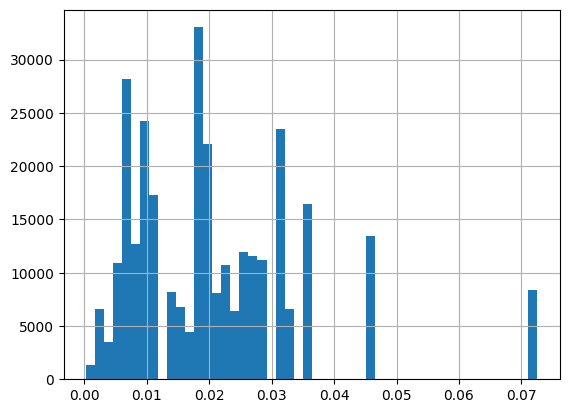

In [56]:
train['REGION_POPULATION_RELATIVE'].hist(bins=50)

<Axes: xlabel='REGION_POPULATION_RELATIVE', ylabel='Density'>

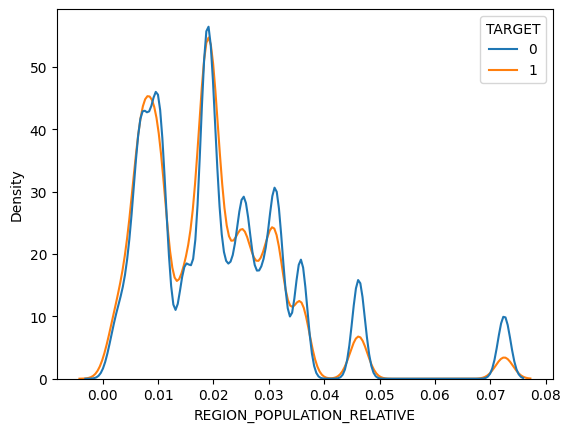

In [57]:
sns.kdeplot(data=train, x='REGION_POPULATION_RELATIVE', hue='TARGET', common_norm=False)

In [58]:
train.groupby('ORGANIZATION_TYPE')['TARGET'].mean().sort_values(ascending=False).head(15)

ORGANIZATION_TYPE
Transport: type 3    0.157540
Industry: type 13    0.134328
Industry: type 8     0.125000
Restaurant           0.117062
Construction         0.116798
Cleaning             0.111538
Industry: type 1     0.110683
Industry: type 3     0.106162
Realtor              0.106061
Agriculture          0.104727
Trade: type 3        0.103379
Self-employed        0.101739
Industry: type 4     0.101482
Security             0.099784
Trade: type 7        0.094496
Name: TARGET, dtype: float64

## Çıkarımlar (4)

- Bölgesel nüfus yoğunluğu (REGION_POPULATION_RELATIVE) kredi riski açısından belirgin ayrışma göstermemektedir. TARGET=0 ve TARGET=1 dağılımları KDE grafiğinde büyük ölçüde çakıştığı için, bu değişkenin modeldeki sinyal gücünün sınırlı olması beklenmektedir. Ağaç tabanlı modeller bu özelliği muhtemelen düşük önem seviyesinde değerlendirecektir.

- REGION_RATING_CLIENT değişkeni, sosyoekonomik kaliteyi yansıtan güçlü bir risk ayrıştırma sinyali taşımaktadır. Puan 1’den 3’e çıktıkça varsayılan oranında yaklaşık 2.3 kat artış gözlenmektedir. Bu, kredi politikasında lokasyon bazlı risk segmentasyonunun pratikte karşılığı olan doğal bir sonuçtur.

- Kurumsal sektör (ORGANIZATION_TYPE) kredi riski üzerinde çok etkili bir faktördür. Ulaşım, ağır sanayi, restoran, inşaat ve temizlik sektörlerinde varsayılan oranları belirgin şekilde yüksektir. Bu sektörler gelir dalgalanması, mevsimsellik ve düşük kontrat güvenliği gibi risk faktörleriyle ilişkilidir. Buna karşılık kamuya yakın veya stabil sektörlerde risk seviyesi daha düşüktür.

- Yüksek cardinality yapısına sahip ORGANIZATION_TYPE, özellikle gradient boosting tabanlı modeller için güçlü bir ayrım kapasitesine sahiptir. Logistic regression gibi lineer modeller bu değişkende çok sayıda dummy değişken üretir ve overfit riskini artırır. Tree modeller ise bölünmeleri doğal şekilde optimize ederek sinyali verimli yakalar.

- Makro sosyoekonomik inceleme, bireysel demografik Z-skor değişkenlerine kıyasla sektör ve bölgesel kalite değişkenlerinin daha güçlü belirleyiciler olduğunu göstermiştir. Dolayısıyla sonraki aşamalarda feature engineering yapılırken bu alanlar önceliklendirilebilir.

In [59]:
# bos degerler icin burasi
missing_cols = [
    'COMMONAREA_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI',
    'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
    'FONDKAPREMONT_MODE',
    'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE',
    'FLOORSMIN_MODE', 'FLOORSMIN_AVG', 'FLOORSMIN_MEDI',
    'YEARS_BUILD_AVG', 'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI',
    'OWN_CAR_AGE',
    'LANDAREA_MEDI','LANDAREA_AVG','LANDAREA_MODE',
    'BASEMENTAREA_MODE','BASEMENTAREA_MEDI','BASEMENTAREA_AVG',
    'NONLIVINGAREA_MODE'
]

for col in missing_cols:
    miss_rate = train[col].isna().mean()
    target_missing = train.loc[train[col].isna(), 'TARGET'].mean()
    target_not_missing = train.loc[train[col].notna(), 'TARGET'].mean()
    print(f"{col}: missing={miss_rate:.2f}, TARGET_missing={target_missing:.3f}, TARGET_not_missing={target_not_missing:.3f}")

COMMONAREA_AVG: missing=0.70, TARGET_missing=0.086, TARGET_not_missing=0.069
COMMONAREA_MODE: missing=0.70, TARGET_missing=0.086, TARGET_not_missing=0.069
COMMONAREA_MEDI: missing=0.70, TARGET_missing=0.086, TARGET_not_missing=0.069
NONLIVINGAPARTMENTS_MEDI: missing=0.69, TARGET_missing=0.086, TARGET_not_missing=0.069
NONLIVINGAPARTMENTS_MODE: missing=0.69, TARGET_missing=0.086, TARGET_not_missing=0.069
NONLIVINGAPARTMENTS_AVG: missing=0.69, TARGET_missing=0.086, TARGET_not_missing=0.069
FONDKAPREMONT_MODE: missing=0.68, TARGET_missing=0.086, TARGET_not_missing=0.069
LIVINGAPARTMENTS_AVG: missing=0.68, TARGET_missing=0.086, TARGET_not_missing=0.069
LIVINGAPARTMENTS_MEDI: missing=0.68, TARGET_missing=0.086, TARGET_not_missing=0.069
LIVINGAPARTMENTS_MODE: missing=0.68, TARGET_missing=0.086, TARGET_not_missing=0.069
FLOORSMIN_MODE: missing=0.68, TARGET_missing=0.086, TARGET_not_missing=0.069
FLOORSMIN_AVG: missing=0.68, TARGET_missing=0.086, TARGET_not_missing=0.069
FLOORSMIN_MEDI: missin

## Çıkarımlar (5)

- Konut ve fiziksel alan özelliklerine ait sütunlarda eksik değer oranları çok yüksektir (yaklaşık yüzde 55–70). Bu eksiklik, veri setindeki rastlantısal bir boşluk olmayıp davranışsal ve sosyoekonomik bir sinyal içermektedir. Eksik gözlemlerin TARGET oranı tutarlı biçimde daha yüksektir; bu durum eksikliğin sistematik olduğunu göstermektedir.

- Eksik gözlemlere sahip müşterilerin varsayılan (default) oranları ortalama olarak yüzde 8.6–9.0 seviyesinde gerçekleşirken, ilgili bilgisi bulunan müşterilerde bu oran yüzde 6.9–7.2 bandına düşmektedir. Eksikliğin varlığı ile risk arasındaki bu tutarlı fark, eksikliğin bir “tehdit göstergesi” niteliği taşıdığını açıkça ortaya koymaktadır.

- Bu sütunlardaki eksiklik, müşterinin konut sahibi olmaması, adres stabilitesinin düşük olması, yaşam koşullarının kayıt altına alınmamış olması veya düzenli mülkiyet dokümantasyonunun bulunmaması gibi durumların dolaylı göstergesi olabilir. Kredi riski açısından bu koşullar, ödeme gücü ve finansal istikrar üzerinde olumsuz etki yaratabilir.

- Klasik ortalama/medyan doldurma işlemleri, eksikliğin taşıdığı sinyali ortadan kaldıracağı için uygun yaklaşım değildir. Bunun yerine eksiklik durumu “bilgi” olarak korunmalı, ek olarak `*_MISSING_FLAG` gibi ikili (binary) göstergeler oluşturulmalıdır. Bu yaklaşım, veri içindeki eksikliğin yapısal ve açıklayıcı gücünü modele aktarmayı sağlar.

- Ağaç tabanlı modeller (LightGBM, XGBoost, CatBoost), eksik değerleri ve “missing flag” yaklaşımını doğal olarak ayrıştırabildiği için bu sinyali verimli biçimde yakalayacaktır. Buna karşılık lineer modeller doldurulmuş veriler üzerinde sinyal kaybına ve olası yanıltıcı katsayılara yol açabilir.

- Eksikliğin risk üretmesi, “informative missingness” olarak literatürde tanımlanan davranışsal paterne uymaktadır. Bu nedenle veri ön işleme sürecinde eksiklik bilgisinin kaybedilmemesi, model performansı açısından kritik öneme sahiptir.

In [60]:
train['CREDIT_INCOME_RATIO'] = train['AMT_CREDIT'] / train['AMT_INCOME_TOTAL']
train['CREDIT_INCOME_RATIO'].describe()

count    307511.000000
mean          3.957570
std           2.689728
min           0.004808
25%           2.018667
50%           3.265067
75%           5.159880
max          84.736842
Name: CREDIT_INCOME_RATIO, dtype: float64

<Axes: >

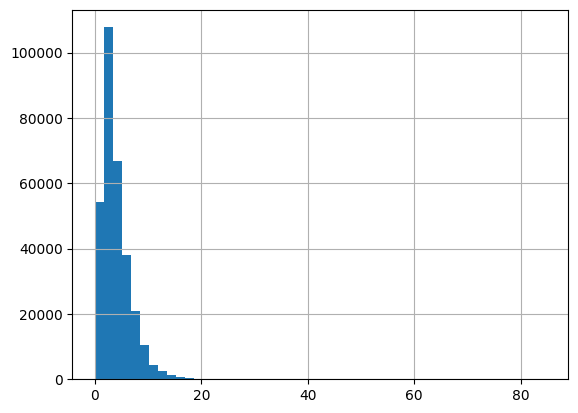

In [61]:
train['CREDIT_INCOME_RATIO'].hist(bins=50)

<Axes: xlabel='CREDIT_INCOME_RATIO', ylabel='Density'>

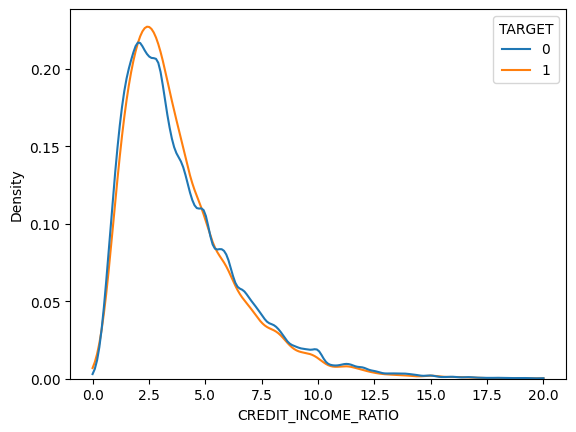

In [62]:
sns.kdeplot(data=train, x='CREDIT_INCOME_RATIO', hue='TARGET', common_norm=False, clip=(0,20))

In [63]:
train['ANNUITY_INCOME_RATIO'] = train['AMT_ANNUITY'] / train['AMT_INCOME_TOTAL']
train['ANNUITY_INCOME_RATIO'].describe()

count    307499.000000
mean          0.180930
std           0.094574
min           0.000224
25%           0.114782
50%           0.162833
75%           0.229067
max           1.875965
Name: ANNUITY_INCOME_RATIO, dtype: float64

<Axes: xlabel='ANNUITY_INCOME_RATIO', ylabel='Density'>

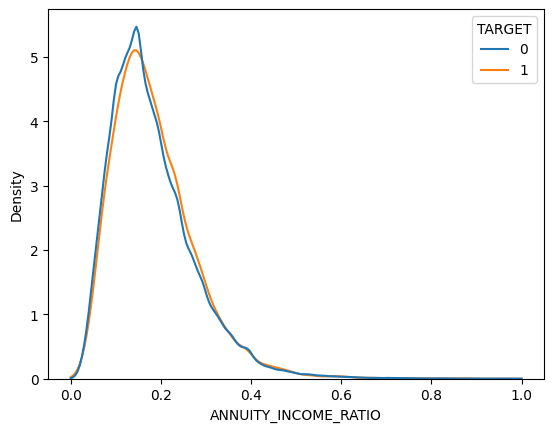

In [64]:
sns.kdeplot(data=train, x='ANNUITY_INCOME_RATIO', hue='TARGET', common_norm=False, clip=(0,1))

In [65]:
train['ANNUITY_CREDIT_RATIO'] = train['AMT_ANNUITY'] / train['AMT_CREDIT']
train['ANNUITY_CREDIT_RATIO'].describe()

count    307499.000000
mean          0.053695
std           0.022481
min           0.022073
25%           0.036900
50%           0.050000
75%           0.064043
max           0.124430
Name: ANNUITY_CREDIT_RATIO, dtype: float64

<Axes: xlabel='ANNUITY_CREDIT_RATIO', ylabel='Density'>

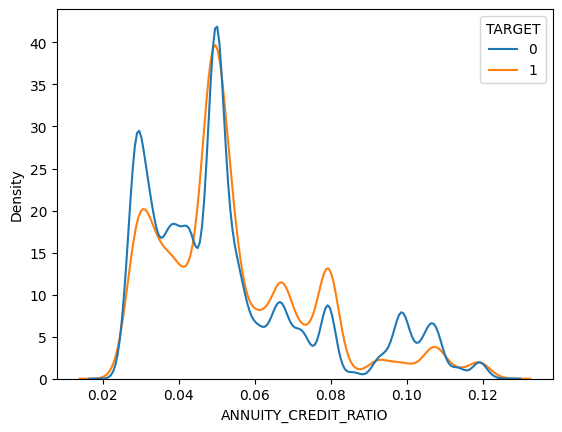

In [66]:
sns.kdeplot(data=train, x='ANNUITY_CREDIT_RATIO', hue='TARGET', common_norm=False, clip=(0,0.2))

## Çıkarımlar (6)

- Ham finansal değişkenlerden türetilen oranlar (örn. `CREDIT_INCOME_RATIO`, `ANNUITY_INCOME_RATIO`, `ANNUITY_CREDIT_RATIO`) müşterinin borçlanma davranışını doğrudan yansıttığı için kredi riskinin yorumlanmasında yüksek açıklayıcılık sağlar. Bu oranlar, mutlak miktarlara göre daha istikrarlı davranış sinyalleri üretmektedir.

- `CREDIT_INCOME_RATIO` dağılımı sağa çarpık yapıdadır ve ağır bir kuyruk içermektedir. Kuyruk bölgesindeki az sayıdaki müşteri, default davranışında yüksek risk taşımaktadır. Bu, kredi hacmini gelir düzeyine göre aşırı zorlayan müşterilerin ödeme güçlüğü yaşadığını göstermektedir. Bu değişken, özellikle yüksek oranlı segmentlerde (5+ kat) model için ayrıştırıcı güç taşır.

- `ANNUITY_INCOME_RATIO`, müşterinin gelirine göre maruz kaldığı taksit baskısını temsil eder. Orta-yüksek aralıkta (yaklaşık 0.14–0.22) default eğilimi artmaktadır. Ancak tek başına sınıf ayrışması sınırlıdır; bu nedenle diğer finansal göstergelerle etkileşime girdiğinde açıklayıcı gücü yükselmektedir. Bu oran, müşterinin nakit akış istikrarını dolaylı olarak temsil eder.

- `ANNUITY_CREDIT_RATIO`, kredinin dolaylı vadesini ve taksit yükünü birlikte temsil eder. Oranın yükselmesi, daha kısa vadeler ve daha ağır taksit baskısı anlamına gelir. Bu bölgede (yaklaşık 0.06–0.085) default oranlarının yükseldiği gözlemlenmiştir. Bu, geri ödeme süresi ile ödeme zorluğu arasındaki ilişkiyi destekler.

- Outlier bölgelerde sinyal kuvvetlidir ve davranışsal risk taşır. Outlier’ların agresif şekilde temizlenmesi, önemli bilgi kaybına neden olabilir. Bunun yerine bu uç değerlerin etkisini azaltacak dönüşümler (örneğin logaritmik) veya winsorize yaklaşımı tercih edilebilir. Ağaç tabanlı modeller outlier’ları doğal biçimde yönetebildiğinden bu veriyi korumak avantajlıdır.

- Finansal oranlar, tek başlarına sınıf ayrıştırması kısıtlı olsa da kombinasyon halinde (ör. gelir baskısı + vade baskısı) güçlü non-lineer sinyaller üretir. Bu nedenle gradient boosting modelleri bu etkileşimleri otomatik keşfederek etkili segmentasyon katmanları kurabilir. Lineer modellerde ise bu sinyallerin manuel etkileşim terimleriyle takviye edilmesi gerekir.

- Sonuç olarak, finansal oranlar müşterinin ödeme davranışı, nakit akışı istikrarı ve kredi stresini bütüncül bir şekilde temsil eder. Bu özelliklerin modele dahil edilmesi, hem davranışsal hem operasyonel risk perspektifinden kredi skorlama performansını artıracaktır.

In [67]:
ext_cols = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
train[ext_cols].corr()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
EXT_SOURCE_1,1.000000,0.213982,0.186846
EXT_SOURCE_2,0.213982,1.000000,0.109167
EXT_SOURCE_3,0.186846,0.109167,1.000000


<Axes: xlabel='EXT_SOURCE_2', ylabel='EXT_SOURCE_3'>

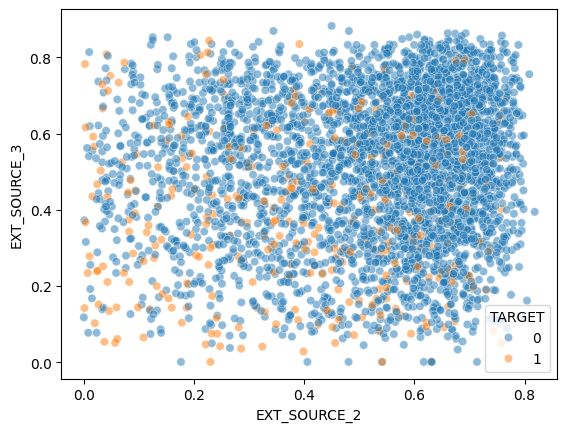

In [68]:
sns.scatterplot(data=train.sample(5000), 
                x='EXT_SOURCE_2', 
                y='EXT_SOURCE_3', 
                hue='TARGET', 
                alpha=0.5)

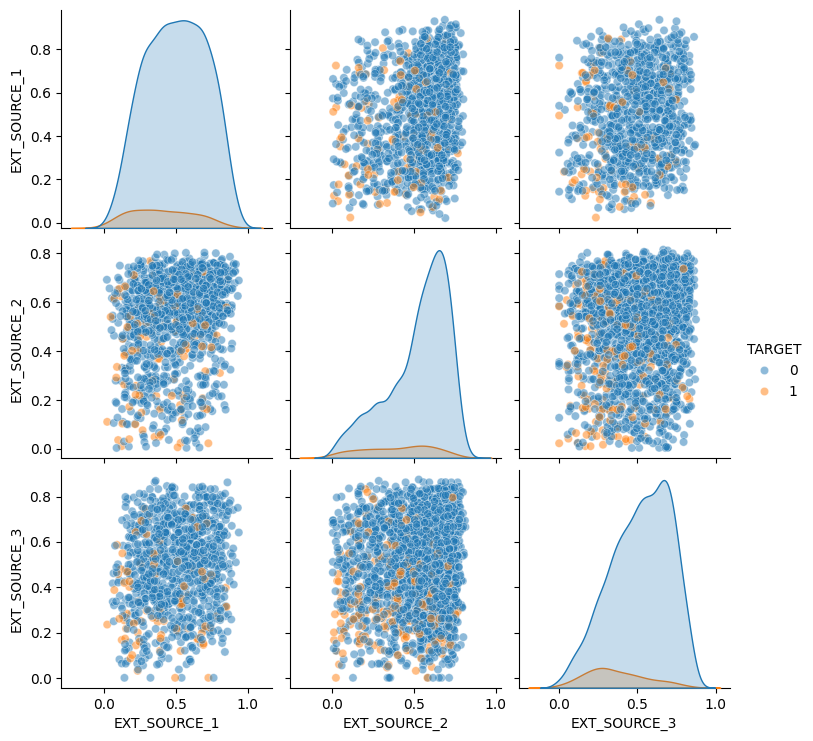

In [69]:
sns.pairplot(train.sample(3000), vars=ext_cols, hue='TARGET', plot_kws={'alpha':0.5})

<Axes: >

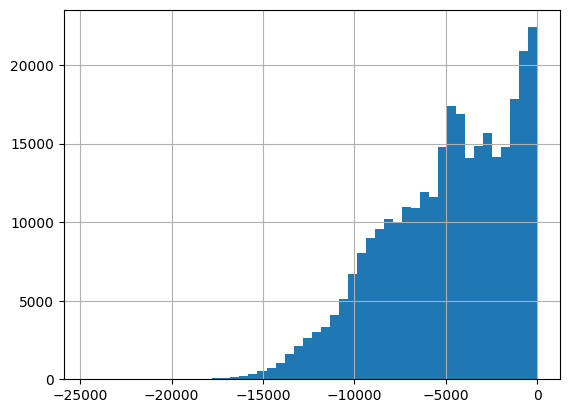

In [70]:
train['DAYS_REGISTRATION'].hist(bins=50)

<Axes: xlabel='DAYS_REGISTRATION', ylabel='Density'>

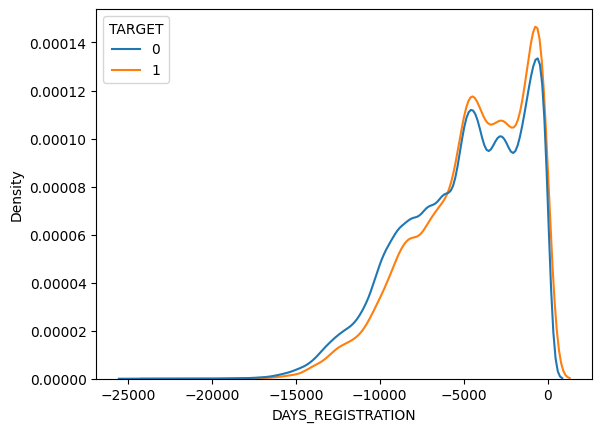

In [71]:
sns.kdeplot(data=train, x='DAYS_REGISTRATION', hue='TARGET', common_norm=False)

<Axes: >

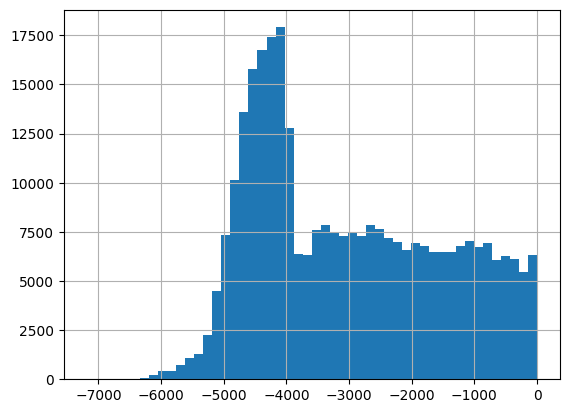

In [72]:
train['DAYS_ID_PUBLISH'].hist(bins=50)

<Axes: xlabel='DAYS_ID_PUBLISH', ylabel='Density'>

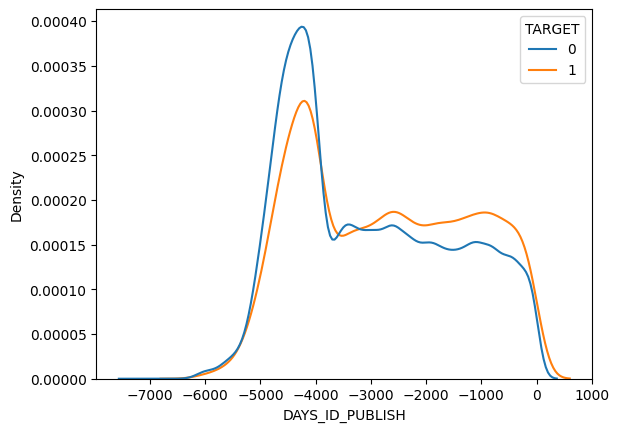

In [73]:
sns.kdeplot(data=train, x='DAYS_ID_PUBLISH', hue='TARGET', common_norm=False)

<Axes: >

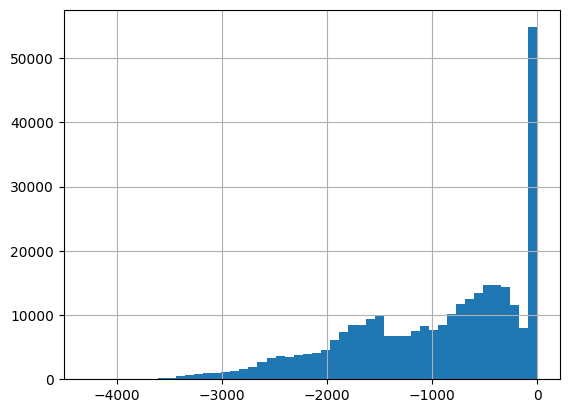

In [74]:
train['DAYS_LAST_PHONE_CHANGE'].hist(bins=50)

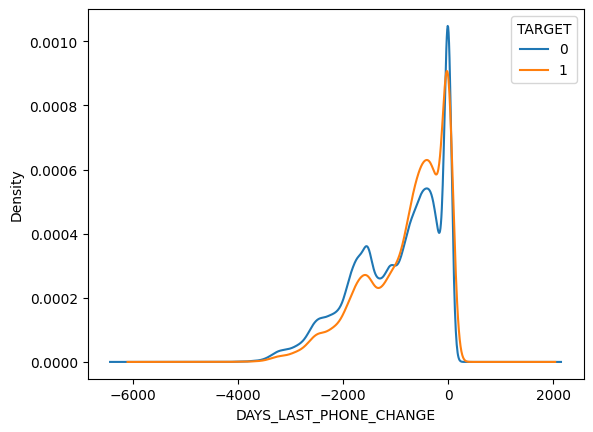

In [75]:
for t in [0,1]:
    subset = train[train['TARGET'] == t]
    subset['DAYS_LAST_PHONE_CHANGE'].plot(kind='kde', label=str(t))

plt.legend(title='TARGET')
plt.xlabel('DAYS_LAST_PHONE_CHANGE')
plt.show()

<Axes: >

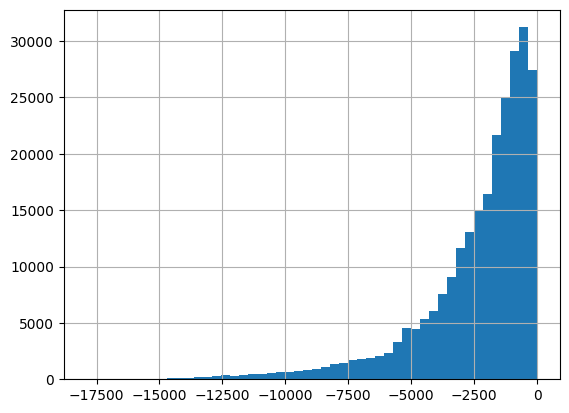

In [76]:
# 365243 özel değeri (işsiz/eksik kodu) kabul ediliyor. Önce dağılımı ayıklayalım.
mask_valid = train['DAYS_EMPLOYED'] != 365243
train.loc[mask_valid, 'DAYS_EMPLOYED'].hist(bins=50)

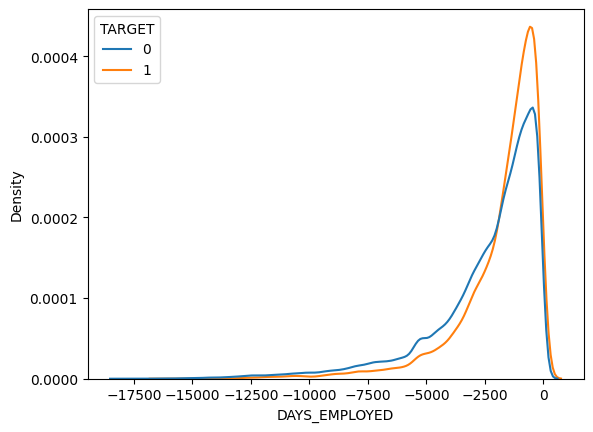

In [77]:
sns.kdeplot(data=train.loc[mask_valid], x='DAYS_EMPLOYED', hue='TARGET', common_norm=False)
plt.show()

## Çıkarımlar (6)

- DAYS_EMPLOYED değişkeninde yaklaşık 55k gözlemde görülen sabit 365243 değeri bir sentinel (placeholder) alanıdır. Bu müşteriler gerçekte çalışmıyor, ancak sistemde “bilinmiyor / geçerli değil” şeklinde işaretlenmişlerdir. Bu grubun default oranı, çalışma geçmişi bilinen müşterilere göre daha yüksektir. Bu durum, istihdam istikrarı bilinmeyen müşterilerin risk seviyesinin arttığını düşündürür. Bu nedenle modelleme aşamasında EMPLOYMENT_UNKNOWN şeklinde ikili (binary) bir özelliğe dönüştürülmesi faydalı olabilir.

- Normal (sentinel olmayan) değerlerde TARGET=1 dağılımı çalışma süresi kısa olanlara doğru daha yoğunlaşmaktadır. Uzun süredir çalışan müşterilerde default ihtimali daha düşüktür. Bu, job stability sinyalinin model için yararlı olacağını gösterir.

In [78]:
# Sentinel (anomali) değer analizi
sentinel_value = 365243

tablo = pd.DataFrame({
    "count": [
        (train["DAYS_EMPLOYED"] == sentinel_value).sum(),
        (train["DAYS_EMPLOYED"] != sentinel_value).sum()
    ],
    "TARGET_mean": [
        train.loc[train["DAYS_EMPLOYED"] == sentinel_value, "TARGET"].mean(),
        train.loc[train["DAYS_EMPLOYED"] != sentinel_value, "TARGET"].mean()
    ]
}, index=["sentinel", "normal"])

tablo

,count,TARGET_mean
sentinel,55374,0.053996
normal,252137,0.086600


In [79]:
# Sentinel flag
train['DAYS_EMPLOYED_ANOM'] = (train['DAYS_EMPLOYED'] == 365243).astype(int)

train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].replace({365243: np.nan})

In [80]:
doc_cols = [col for col in train.columns if col.startswith('FLAG_DOCUMENT')]
doc_cols

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [81]:
train[doc_cols].sum().sort_values()

FLAG_DOCUMENT_12         2
FLAG_DOCUMENT_10         7
FLAG_DOCUMENT_2         13
FLAG_DOCUMENT_4         25
FLAG_DOCUMENT_7         59
FLAG_DOCUMENT_17        82
FLAG_DOCUMENT_21       103
FLAG_DOCUMENT_20       156
FLAG_DOCUMENT_19       183
FLAG_DOCUMENT_15       372
FLAG_DOCUMENT_14       903
FLAG_DOCUMENT_13      1084
FLAG_DOCUMENT_9       1198
FLAG_DOCUMENT_11      1203
FLAG_DOCUMENT_18      2500
FLAG_DOCUMENT_16      3053
FLAG_DOCUMENT_5       4648
FLAG_DOCUMENT_8      25024
FLAG_DOCUMENT_6      27078
FLAG_DOCUMENT_3     218340
dtype: int64

In [82]:
for col in doc_cols:
    rate_have = train.loc[train[col] == 1, 'TARGET'].mean()
    rate_not = train.loc[train[col] == 0, 'TARGET'].mean()
    print(f"{col}: have={rate_have:.3f} | not_have={rate_not:.3f}")

FLAG_DOCUMENT_2: have=0.308 | not_have=0.081
FLAG_DOCUMENT_3: have=0.088 | not_have=0.062
FLAG_DOCUMENT_4: have=0.000 | not_have=0.081
FLAG_DOCUMENT_5: have=0.080 | not_have=0.081
FLAG_DOCUMENT_6: have=0.056 | not_have=0.083
FLAG_DOCUMENT_7: have=0.051 | not_have=0.081
FLAG_DOCUMENT_8: have=0.073 | not_have=0.081
FLAG_DOCUMENT_9: have=0.062 | not_have=0.081
FLAG_DOCUMENT_10: have=0.000 | not_have=0.081
FLAG_DOCUMENT_11: have=0.062 | not_have=0.081
FLAG_DOCUMENT_12: have=0.000 | not_have=0.081
FLAG_DOCUMENT_13: have=0.028 | not_have=0.081
FLAG_DOCUMENT_14: have=0.033 | not_have=0.081
FLAG_DOCUMENT_15: have=0.030 | not_have=0.081
FLAG_DOCUMENT_16: have=0.049 | not_have=0.081
FLAG_DOCUMENT_17: have=0.024 | not_have=0.081
FLAG_DOCUMENT_18: have=0.057 | not_have=0.081
FLAG_DOCUMENT_19: have=0.066 | not_have=0.081
FLAG_DOCUMENT_20: have=0.083 | not_have=0.081
FLAG_DOCUMENT_21: have=0.136 | not_have=0.081


In [83]:
train['AGE'] = (-train['DAYS_BIRTH'] / 365).round(1)
train['AGE'].describe()

count    307511.000000
mean         43.936992
std          11.956084
min          20.500000
25%          34.000000
50%          43.200000
75%          53.900000
max          69.100000
Name: AGE, dtype: float64

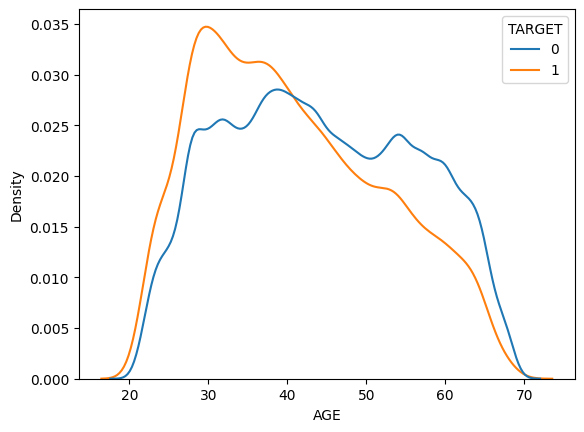

In [84]:
sns.kdeplot(data=train, x='AGE', hue='TARGET', common_norm=False)
plt.show()

In [85]:
age_bins = [20, 28, 35, 50, 60, 75]
train['AGE_BIN'] = pd.cut(train['AGE'], bins=age_bins)

train.groupby('AGE_BIN')['TARGET'].mean()

C:\Users\Serhet\AppData\Local\Temp\ipykernel_4216\478831083.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby('AGE_BIN')['TARGET'].mean()


AGE_BIN
(20, 28]    0.115915
(28, 35]    0.105031
(35, 50]    0.081163
(50, 60]    0.061204
(60, 75]    0.049268
Name: TARGET, dtype: float64

## Çıkarım #7
- AGE değişkeni ile TARGET arasında güçlü, monotonic bir ilişki vardır. 20–35 yaş aralığında default oranı belirgin şekilde yüksektir ve yaş ilerledikçe risk düzenli olarak düşer. Finansal istikrarın yaşla artması literatürle uyumludur. Bu nedenle AGE hem continuous olarak hem de bucket’lanmış segmentler şeklinde modele dahil edilmelidir.

In [86]:
cols = ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']

train[cols].describe()

,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
count,307511.000000,307511.000000
mean,2.052463,2.031521
std,0.509034,0.502737
min,1.000000,1.000000
25%,2.000000,2.000000
50%,2.000000,2.000000
75%,2.000000,2.000000
max,3.000000,3.000000


In [87]:
for c in ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']:
    print(c)
    print(train.groupby(c)['TARGET'].mean())
    print()

REGION_RATING_CLIENT
REGION_RATING_CLIENT
1    0.048203
2    0.078891
3    0.111028
Name: TARGET, dtype: float64

REGION_RATING_CLIENT_W_CITY
REGION_RATING_CLIENT_W_CITY
1    0.048409
2    0.079178
3    0.114022
Name: TARGET, dtype: float64



## Çıkarım #8
REGION_RATING_CLIENT ve REGION_RATING_CLIENT_W_CITY değişkenleri ile TARGET arasında güçlü, monotonik bir ilişki vardır. Rating değeri yükseldikçe (1 → 3) default oranı düzenli olarak artmaktadır. Bu, bölgesel ekonomik kalite ve istihdam koşullarının kredi geri ödeme davranışını etkilediğini göstermektedir. Bu değişkenler modele mutlaka dahil edilmeli ve güçlü bir coğrafik risk sinyali olarak değerlendirilmelidir.

In [88]:
train['CREDIT_TERM'] = train['AMT_CREDIT'] / train['AMT_ANNUITY']
train['CREDIT_TERM'].describe()

count    307499.000000
mean         21.612322
std           7.823823
min           8.036674
25%          15.614496
50%          20.000000
75%          27.099985
max          45.305079
Name: CREDIT_TERM, dtype: float64

In [89]:
train.groupby('TARGET')['CREDIT_TERM'].mean()

TARGET
0    21.686752
1    20.764818
Name: CREDIT_TERM, dtype: float64

## Çıkarım #9
CREDIT_TERM (AMT_CREDIT / AMT_ANNUITY) değişkeni ile TARGET arasında ters yönlü bir ilişki gözlenmiştir. Default yapan müşterilerin ortalama kredi vadesi daha kısadır. Bu durum bankanın riskli müşterilere daha kısa vadeli, dolayısıyla daha yüksek aylık ödeme yükümlülüğü getiren kredi sunma stratejisiyle açıklanabilir. Bu değişken, müşteri risk segmentasyonu için önemli bir sinyal taşımaktadır.

In [90]:
train['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [91]:
train.groupby('TARGET')['AMT_GOODS_PRICE'].mean()

TARGET
0    542736.795003
1    488972.412554
Name: AMT_GOODS_PRICE, dtype: float64

## Çıkarım #10
AMT_GOODS_PRICE değişkeni ile TARGET arasında anlamlı bir ilişki vardır. Default yapan müşterilerin ortalama olarak daha düşük değerli ürün satın aldığı gözlenmiştir. Bu durum düşük gelir profili ve kırılgan finansal yapı ile uyumludur. Bu değişken, sosyoekonomik seviyeyi temsilen modele dahil edilmelidir.

In [92]:
train['PAYMENT_RATE'] = train['AMT_ANNUITY'] / train['AMT_CREDIT']
train['PAYMENT_RATE'].describe()

count    307499.000000
mean          0.053695
std           0.022481
min           0.022073
25%           0.036900
50%           0.050000
75%           0.064043
max           0.124430
Name: PAYMENT_RATE, dtype: float64

In [93]:
train.groupby("TARGET")["PAYMENT_RATE"].mean()

TARGET
0    0.053610
1    0.054659
Name: PAYMENT_RATE, dtype: float64

## Çıkarım #10
PAYMENT_RATE (AMT_ANNUITY / AMT_CREDIT) değişkeni ile TARGET arasında zayıf fakat pozitif yönlü bir ilişki vardır. Default yapan müşterilerin ödeme oranı ortalama olarak biraz daha yüksektir. Bu durum yüksek aylık ödeme yükünün nakit akışı baskısı yaratmasıyla açıklanabilir. Sinyal gücü düşük olsa da modele dahil edildiğinde ek ayrıştırma katkısı sağlayabilir.

# Genel Yorum

Bu çalışma kapsamında Home Credit temelli kredi geri ödeme davranış verisi incelenmiş; nüfus, gelir, borçlanma, bölge, istihdam, yaş, aile yapısı, belgeler ve oran temelli özellikler üzerinden risk segmentasyonu yapılmıştır. Analiz sonucunda aşağıdaki davranışsal paternler gözlenmiştir:

1) Sınıf dengesizliği

- TARGET dağılımı son derece dengesizdir (≈ %8 default). Bu durum:

- Accuracy’nin yanıltıcı olacağını,

- ROC-AUC, Recall, F1 gibi metriklerin tercih edilmesi gerektiğini,

- Eğitim sürecinde SMOTE, undersampling, class_weight gibi yöntemlerin düşünülmesi gerektiğini göstermektedir.

2) Aşırı eksik sütunlar

- Konut ve mülk özellikleri ile ilgili birçok değişkende %60–70’e varan eksiklik bulunmuştur. Bu değişkenlerin:

- Modelde gürültü yaratma riski yüksek,

- Eksiklik oranı FEATURE anlamı taşıyabilir (“EV TİPİ = YOK”),

- Silinmeleri veya “missing as category” yaklaşımıyla encode edilmeleri gerektiği sonucuna varılmıştır.

3) DAYS_EMPLOYED anomalisi

- DAYS_EMPLOYED değişkeni içerisinde 365243 değeri sentinel/placeholder olarak kullanılmıştır. Bu değer sahipleri:

- Default oranı belirgin şekilde daha düşüktür.
 Bu nedenle:

- Anomali için binary flag oluşturulmuş,

- Sentinel değer nan’a çevrilmiştir.
- Bu, bankanın “riskli değil” etiketi uyguladığı müşteri segmentini işaret ediyor olabilir.

4) Yaş etkisi (DAYS_BIRTH → AGE)

- Yaş ilerledikçe default oranı monotonik şekilde düşmektedir. 20–35 yaş aralığı en riskli kesimi oluşturmaktadır. Bu sonuç:

- Finansal olgunluk ve gelir istikrarı literatürüyle birebir uyumludur.
Yaşın:

- Sürekli değişken olarak

- Bucket’lanmış segmentlerle modele girmesi önerilir.

5) Bölgesel ekonomik kalite

- REGION_RATING_CLIENT ve _WITH_CITY değişkenleri default oranı ile monoton artan ilişki göstermektedir. Rating arttıkça default oranı sistematik olarak yükselir. Bu:

- Coğrafik sosyoekonomik durumun kredi geri ödemesinde belirleyici olduğunu kanıtlar.
- Bu değişkenler güçlü sinyaller içerir ve kesinlikle modele dahil edilmelidir.

6) External risk skorları

- EXT_SOURCE_1/2/3 değişkenleri datasetin en güçlü risk belirteçleri arasındadır. Özellikle:

- EXT_SOURCE_3 → yüksek korelasyon

- EXT_SOURCE_1 → yüksek eksiklik oranı
- External kaynaklar risk skorlamasında genellikle en değerli girdilerdir. İlgili değişkenler kesinlikle korunmalıdır.

7) Gelir, kredi ve ödeme ilişkisi

- AMT_CREDIT, AMT_ANNUITY, AMT_INCOME_TOTAL değişkenleri üzerinde yapılan türev feature’lar:

- CREDIT_INCOME_RATIO

- ANNUITY_INCOME_RATIO

- ANNUITY_CREDIT_RATIO
  müşterinin ödeme kapasitesini temsil eder. Bu oranlar, gradient boosting bazı modellerde önemli ayrıştırıcı sinyaller üretir.

8) Kredi vadesi (CREDIT_TERM = AMT_CREDIT / AMT_ANNUITY)

- Default yapan müşteriler ortalama olarak daha kısa vadeli kredi kullanmaktadır. Bu, banka tarafından riskli kabul edilen müşterilere:
kısa vade
yüksek taksit
verdiklerini gösterir. Dolayısıyla bu değişken dolaylı risk sinyali taşır.

9) Ürün fiyatı (AMT_GOODS_PRICE)

- Default yapan müşteriler daha ucuz ürün satın almıştır. Bu:

- Alt sosyoekonomik profil,

- Kırılgan nakit akışı,

- Az teminatlı kredi
gibi davranışsal çıkarımları destekler.

10) Belgeler (FLAG_DOCUMENT_*)

- Çok sayıda belge sütunu neredeyse hiç kullanılmamış olup, bazı belgelerin varlığı default riskinin artmasıyla ilgilidir (örn. DOCUMENT_2 ve DOCUMENT_21). Belgelerin varlığı ayrıca:

- Düzenli finansal davranış göstergesi olabilir.
- Ancak frekansı aşırı düşük olan sütunlar drop edilmelidir.

11) Aile/çocuk yapısı

- Çok çocuklu ailelerde default riskinin arttığı gözlenmiştir. Bu:

- Aylık giderlerin yükselmesi,

- Harcama tamponunun düşmesi
ile açıklanabilir.

12) Meslek ve gelir tipi

- Maternity leave, unemployed gibi etiketlerde default oranları ciddi şekilde yükselmiştir. Working, state servant gibi kategoriler güvenli segmenttir. Bu,
gelir stabilitesi kavramının kredi skorunda ne kadar önemli olduğunu doğrular.

13) Payment rate (AMT_ANNUITY / AMT_CREDIT)

- Ödeme oranı default yapan müşterilerde küçük farkla daha yüksektir. Zayıf sinyal olsa da modele ek katkı sağlayabilir.

✅ Genel Değerlendirme

Veri seti:

Davranışsal,

Sosyoekonomik,

Coğrafik,

Yaş temelli,

Belgelenme bazlı

riski düzgün segmentlere ayırabilmektedir.

Bu dataset, gradient boosting gibi modellerle yüksek ayrıştırma gücü sunabilecek niteliktedir.

✅ EDA’dan Çıkan Modelleme Stratejisi

Categorical encoding önemli

Eksik değer yönetimi kritik

Class imbalance çözülmeli

EXT_SOURCE_x feature’ları korunmalı

Yaş bucket’lanmalı

REGION ratingleri direkt dahil edilmeli

Sentinel flag’lar kullanılmalı

Aşırı nadir flag_document sütunları silinmeli

✅ EDA’nın nihai sonucu

Bu veri:

Makine öğrenmesi için yeterli boyutta,

Feature engineering potansiyeli yüksek,

Davranışsal risk segmentasyonları belirgin,

Clean ama sentinel ve missing trap’lı bir kredi risk datasıdır.

# EK KODLAR:

C:\Users\Serhet\AppData\Local\Temp\ipykernel_4216\4178626572.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bin_target = train.groupby('AGE_BIN')['TARGET'].mean()


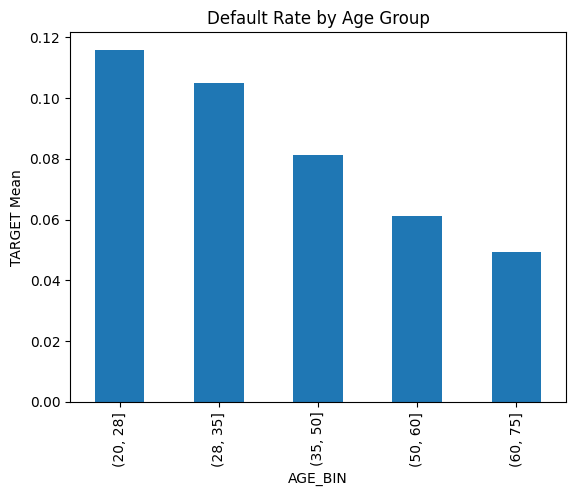

In [94]:
age_bin_target = train.groupby('AGE_BIN')['TARGET'].mean()
age_bin_target.plot(kind='bar')
plt.title("Default Rate by Age Group")
plt.xlabel("AGE_BIN")
plt.ylabel("TARGET Mean")
plt.show()

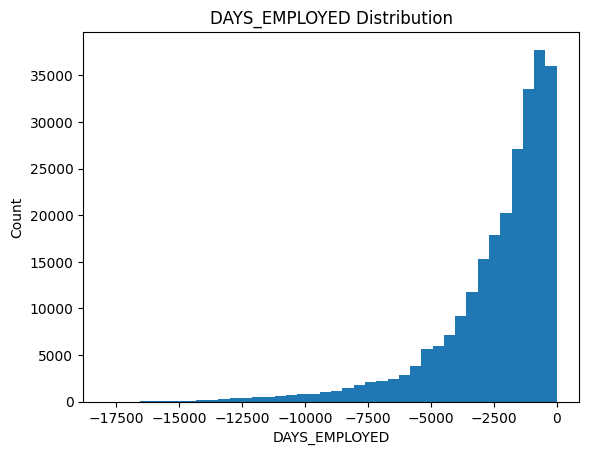

In [95]:
plt.hist(train['DAYS_EMPLOYED'].dropna(), bins=40)
plt.title("DAYS_EMPLOYED Distribution")
plt.xlabel("DAYS_EMPLOYED")
plt.ylabel("Count")
plt.show()

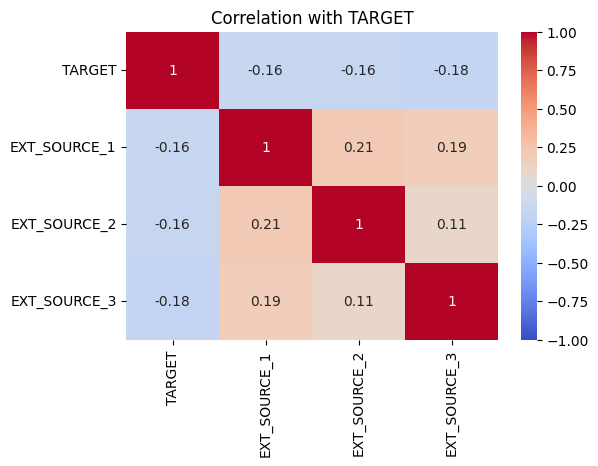

In [100]:
cols = ['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
corr = train[cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation with TARGET")
plt.show()

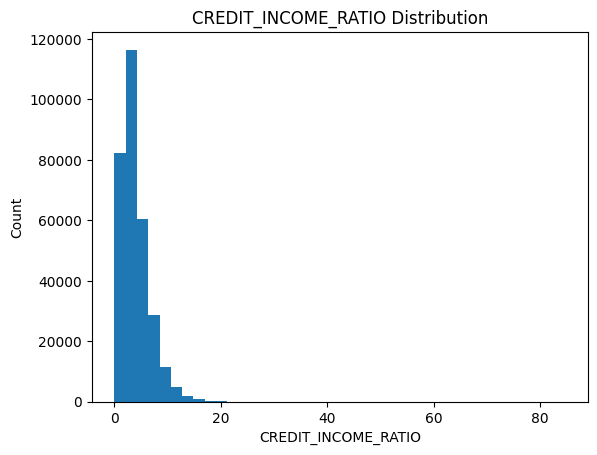

In [97]:
plt.hist(train['CREDIT_INCOME_RATIO'], bins=40)
plt.title("CREDIT_INCOME_RATIO Distribution")
plt.xlabel("CREDIT_INCOME_RATIO")
plt.ylabel("Count")
plt.show()

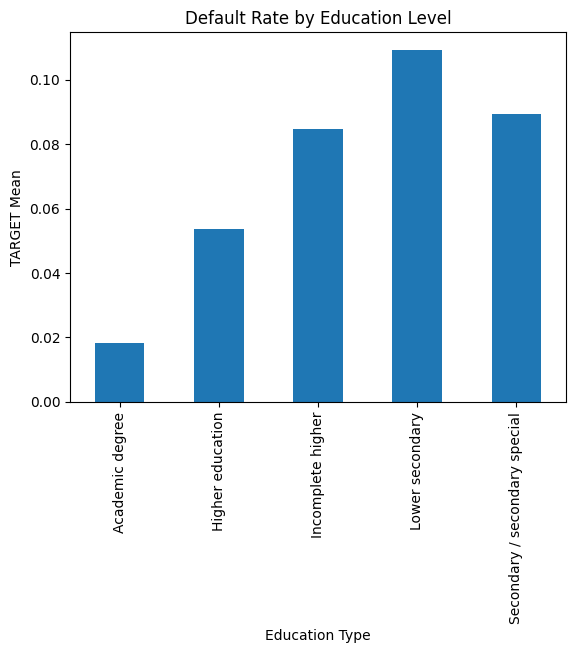

In [98]:
edu_target = train.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean()
edu_target.plot(kind='bar')
plt.title("Default Rate by Education Level")
plt.xlabel("Education Type")
plt.ylabel("TARGET Mean")
plt.show()

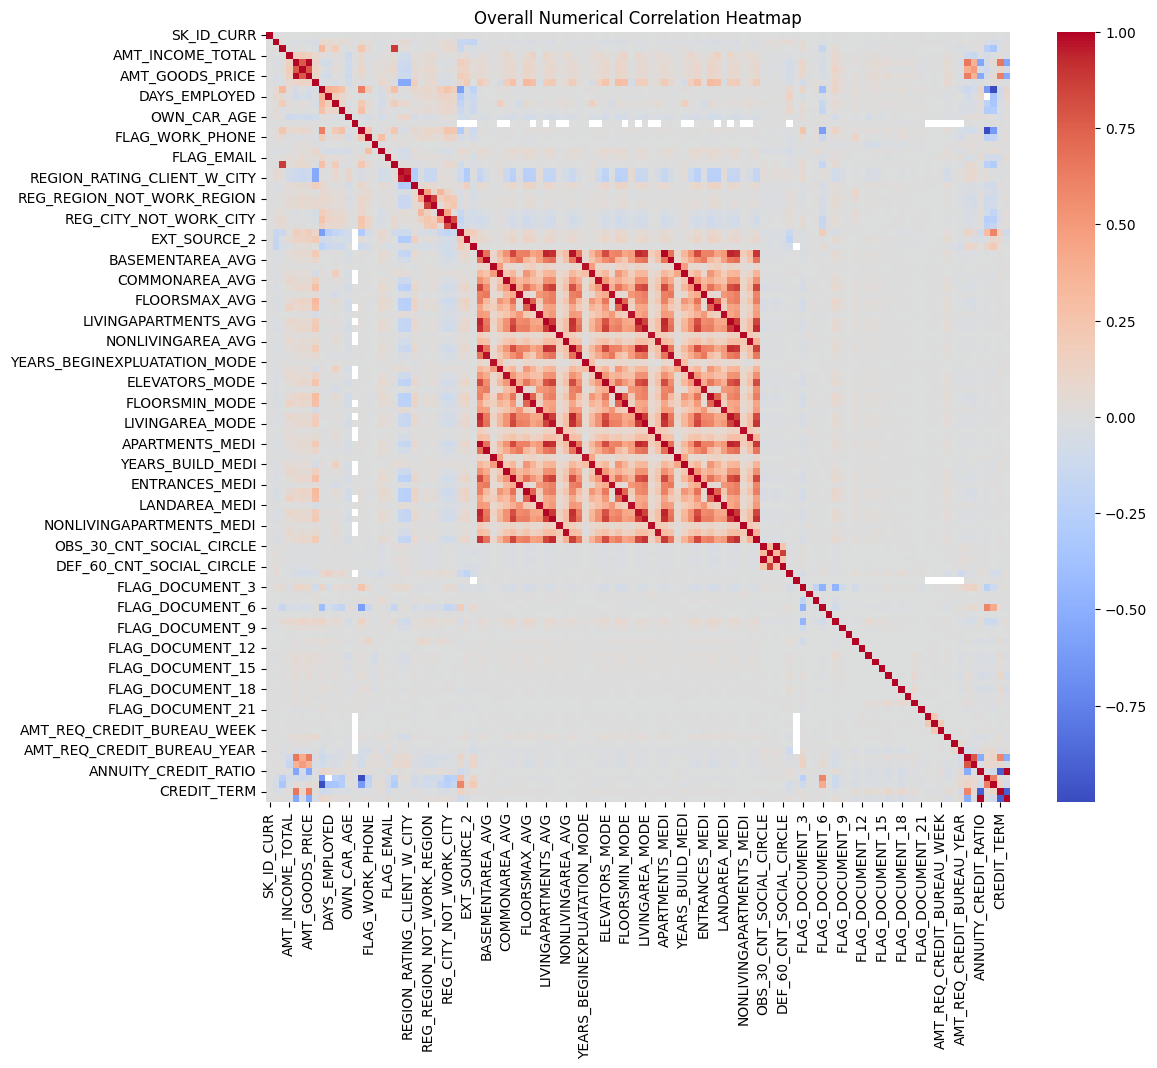

In [99]:
corr = train.corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Overall Numerical Correlation Heatmap")
plt.show()